In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print(tf.__version__)
   
CLASSES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

img_gen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    fill_mode="constant",
    cval=0
)

train_ds = tf.data.Dataset.from_generator(
    img_gen.flow_from_directory(
        "../numberLabel",     
        target_size=(28,12), 
        batch_size=16,
        subset='training',
        color_mode='grayscale',
        class_mode='sparse'
    ),
    output_types=tf.float32,
    output_shapes=()
)

2.0.0
Found 32680 images belonging to 10 classes.


TypeError: `generator` must be callable.

In [2]:
def decode_jpeg_and_label(filename):
    bits = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(bits)
    label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
    label = label.values[-2]
    return image, label

6
7
6
8
3
3
3
2
9
9


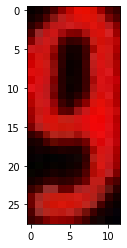

In [3]:
ds = data_pipeline.map(decode_jpeg_and_label)

plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(4,4)

for image, label in ds.take(10):
    plt.imshow(image.numpy())
    print(label.numpy().decode('utf-8'))